<a href="https://www.kaggle.com/code/benlittell/automobile-data?scriptVersionId=112352255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sb

In [2]:
path = '../input/automobiledata/Automobile_data.csv'
ad_df = pd.read_csv(path)
ad_df.drop(['index'], axis=1, inplace=True)
ad_df['num-of-cylinders']
ad_df



,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
56,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [3]:
def str_int(val):
    str_list = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve']
    num_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    try:
        i = str_list.index(val)
        return num_list[i]
    except:
        return val

def corcoeff(xd, yd):
    sigma1 = sigma_xy(xd, yd) * len(xd)
    sigma2 = sum(xd)*sum(yd)
    sigma3 = len(xd) * sum([val**2 for val in xd])
    sigma4 = sum(xd)**2
    sigma5 = len(yd) * sum([val**2 for val in yd])
    sigma6 = sum(yd)**2
    top = (sigma1 - sigma2)
    bottom = (math.sqrt(sigma3-sigma4))*(math.sqrt(sigma5-sigma6))
    return top/bottom

def sigma_xy(xd, yd):
    nlist = []
    for i in range(len(xd)):
        nlist.append((xd[i]*yd[i]))
    return sum(nlist)

ad_df['num-of-cylinders'] = ad_df['num-of-cylinders'].apply(str_int)
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     int64  
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.4+ KB


In [4]:
ad_df.dropna(inplace=True)
new_indices = pd.Series(np.arange(0, len(ad_df)))
ad_df.set_index(new_indices, inplace=True)
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     object 
 1   body-style        58 non-null     object 
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     object 
 5   num-of-cylinders  58 non-null     int64  
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.5+ KB


In [5]:
nc = ad_df.select_dtypes('number').columns.values.tolist()
print(nc)
new_list = []
for c in nc:
    list2 = []
#     print(ad_df[c].tolist())
    for i in nc:
        list2.append(corcoeff(ad_df[c], ad_df[i]))
    new_list.append(list2)
ndf = pd.DataFrame(new_list)
ndf

['wheel-base', 'length', 'num-of-cylinders', 'horsepower', 'average-mileage', 'price']


,0,1,2,3,4,5
0,1.000000,0.881866,0.516737,0.509146,-0.547084,0.663085
1,0.881866,1.000000,0.633069,0.727067,-0.780370,0.788465
2,0.516737,0.633069,1.000000,0.843596,-0.616336,0.765225
3,0.509146,0.727067,0.843596,1.000000,-0.842615,0.901707
4,-0.547084,-0.780370,-0.616336,-0.842615,1.000000,-0.770217
5,0.663085,0.788465,0.765225,0.901707,-0.770217,1.000000


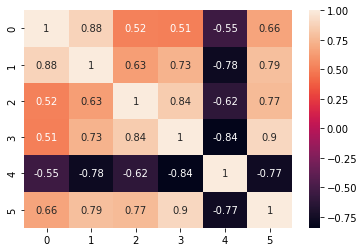

In [6]:
sb.heatmap(ndf, annot=True)
plt.show()

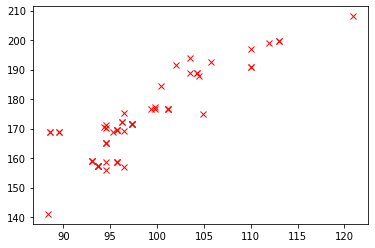

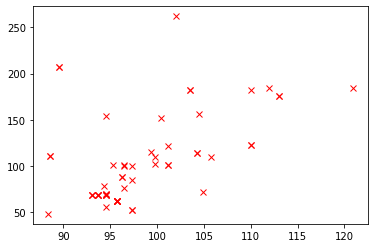

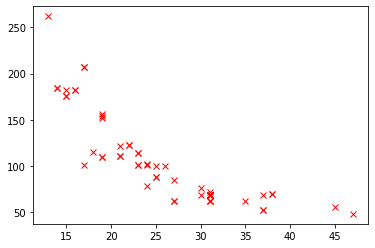

In [7]:
wb = ad_df[nc[0]].values.tolist()
le = ad_df[nc[1]].values.tolist()
cy = ad_df[nc[3]].values.tolist()
hp = ad_df[nc[4]].values.tolist()
plt.plot(wb, le, 'xr')
plt.show()
plt.plot(wb, cy, 'xr')
plt.show()
plt.plot(hp, cy, 'xr')
plt.show()

In [8]:
def least_sqrs(xd, yd):
    matrix1 = [[sum(val**2 for val in xd), sum(xd)], [sum(xd), len(xd)]]
    matrix2 = [sigma_xy(xd, yd), sum(yd)]
    array1 = np.array(matrix1)
    array2 = np.array(matrix2)
    invarray1 = np.linalg.inv(array1)
    solution = np.dot(invarray1, array2)
    return solution


pr = ad_df[nc[5]].values.tolist()
print(pr)
sol = least_sqrs(hp, pr)
hp_ep = [val*sol[0]+sol[1] for val in hp]

[13495.0, 16500.0, 16500.0, 13950.0, 17450.0, 15250.0, 18920.0, 16430.0, 16925.0, 20970.0, 30760.0, 41315.0, 36880.0, 5151.0, 6295.0, 6575.0, 6377.0, 6229.0, 7295.0, 12945.0, 10345.0, 6785.0, 32250.0, 35550.0, 36000.0, 5195.0, 6095.0, 6795.0, 11845.0, 18344.0, 25552.0, 28248.0, 40960.0, 45400.0, 5389.0, 6189.0, 6989.0, 8189.0, 7099.0, 6649.0, 6849.0, 7349.0, 13499.0, 34028.0, 37028.0, 5348.0, 6338.0, 6488.0, 6918.0, 7898.0, 8778.0, 15750.0, 7775.0, 7975.0, 7995.0, 9995.0, 12940.0, 13415.0]


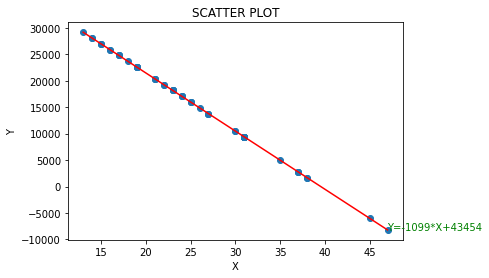

In [9]:
def scatter_plot(data1, data2, slope, y_int):
    y_vals = []
    x_data = [min(data1), max(data1)]
    for val in range(2):
        ans = (slope * x_data[val]) + y_int
        y_vals.append(ans)
    plt.plot(x_data, y_vals, '-r')
    plt.scatter(data1, data2)
    plt.title('SCATTER PLOT')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.text(x_data[1], y_vals[1], f'Y={round(slope)}*X+{round(y_int)}', color='g')
    plt.show()
    

lsc = least_sqrs(hp, hp_ep)
scatter_plot(hp, hp_ep, lsc[0], lsc[1])